In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
#reading the data
df = pd.read_csv("DS_Assignment_Part_1_data_set.csv")
df.rename(columns={'Transaction date':'Transaction_date','House Age':'House_Age','Distance from nearest Metro station (km)':'dist_metro' ,'Number of convenience stores': 'stores','Number of bedrooms':'bedroom','House size (sqft)':'house_size','House price of unit area':'price'},inplace = True)
df.head()

,Transaction_date,House_Age,dist_metro,stores,latitude,longitude,bedroom,house_size,price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
df.describe()

,Transaction_date,House_Age,dist_metro,stores,latitude,longitude,bedroom,house_size,price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [4]:
df.corr()

,Transaction_date,House_Age,dist_metro,stores,latitude,longitude,bedroom,house_size,price
Transaction_date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.061995,0.068437,0.087491
House_Age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
dist_metro,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
bedroom,0.061995,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
house_size,0.068437,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
price,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


* transaction_date has the corr with price = 0.119066 which is least significant, and the House_Age correlation with price is -0.198741 is just greater than the transaction_date.
* while stores, and its position(longitude and the latitude) are better predictor of house price compare to its transaction_date and the House_Age
* dist_metro, bedroom and the house_size these variables are seems like the key factor for deciding the house price

we  can remove the certain variable such as Transaction_date because it hardly affecting the price of the house

<Figure size 720x504 with 0 Axes>

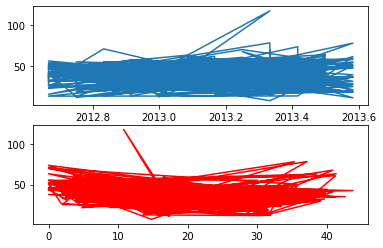

In [5]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
fig, ax = plt.subplots(2)
# Accessing each axes object to plot the data through returned array
ax[0].plot(df['Transaction_date'],df['price'])
ax[1].plot(df['House_Age'],df['price'],color ='red')

there is no correlation of price and date on which the house has been sold as shown by the graph above

In [6]:
df['price']= df['house_size']*df['price']
df.head()

,Transaction_date,House_Age,dist_metro,stores,latitude,longitude,bedroom,house_size,price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,21792.5
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,52328.0
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,50138.0
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,47950.0
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,21162.1


In [7]:
#dividing the data into predictor variable and the target variable
pre_var= df[['Transaction_date','House_Age', 'dist_metro','stores','latitude','longitude','bedroom','house_size']]
target_var = df['price']

#dividing data into training and testing dataset 
x_train,x_test,y_train,y_test=train_test_split(pre_var,target_var,test_size =0.05)


### Using Linear Regression Model

simple model of linear regression is: 
$y = \alpha + \beta x + c$


Since, we are using the multiple linear regression model, we will have to expand the simple model.


$ y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + .......+c$


where $y$ is the target variable and the $x$ are the prediction variable

In [8]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print("the regression coefficents are :",regr.coef_)
print("the regression intercept is :",regr.intercept_)


the regression coefficents are : [ 6.08728697e+03 -2.95297031e+02 -4.94095802e+00  8.67503362e+02
  2.18710940e+05 -3.46455376e+04  3.25151404e+02  3.85369354e+01]
the regression intercept is : -13498881.927332032


In [9]:
y_pred= regr.predict(x_test)
diff = y_test- y_pred
df2 = pd.DataFrame({
    "actual_price": y_test,
    "predicted_price":y_pred,
    "difference": diff
})
df2.round(2)

,actual_price,predicted_price,difference
250,12600.0,16112.94,-3512.94
319,10813.8,12231.33,-1417.53
14,17561.6,27057.87,-9496.27
22,35350.2,46654.55,-11304.35
110,43705.2,39708.15,3997.05
408,13403.7,12345.02,1058.68
36,25899.9,36321.76,-10421.86
382,12042.3,-8331.83,20374.13
279,13684.0,20069.14,-6385.14
223,53721.0,50580.99,3140.01


#### Final result of the linear Regression

In [10]:
from sklearn.metrics import mean_absolute_error as mae
error = mae(y_test, y_pred)
error

6622.361784176192

##### Using statsmodel.api creating a regression model

In [11]:
x_train = sm.add_constant(x_train)
reg_statsmodel  = sm.OLS(y_train,x_train).fit()
reg_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     140.8
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          3.35e-109
Time:                        22:24:09   Log-Likelihood:                -4179.5
No. Observations:                 393   AIC:                             8377.
Df Residuals:                     384   BIC:                             8413.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.35e+07   7.96e+06     -1.697      0.091   -2.91e+07    2.15e+06
Transaction_date  6087.2870   1828.497      3.329      0.001    2492.168    9682.406
House_Age         -295.2970     45.610     -6.474      0.000    -384.974    -205.621
dist_metro          -4.9410      0.851     -5.803      0.000      -6.615      -3.267
stores             867.5034    221.206      3.922      0.000     432.576    1302.431
latitude          2.187e+05   5.32e+04      4.111      0.000    1.14e+05    3.23e+05
longitude        -3.465e+04   5.73e+04     -0.605      0.545   -1.47e+05    7.79e+04
bedroom            325.1514    957.700      0.340      0.734   -1557.842    2208.145
house_size          38.5369      2.261     17.041      0.000      34.091      42.983
==============================================================================
Omnibus:                      321.815   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14231.536
Skew:                           3.039   Prob(JB):                         0.00
Kurtosis:                      31.847   Cond. No.                     3.93e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<!-- Rsquared means how much the dependent variable express the dependent variable. for example 75% of the variance is being explaind by the independnt varible. while the rest 25% of the varience in the price of the home is not explained by the variables. -->

### Using Polynomial Regression 

$ y= b_0+b_1x + b_2x^2+ b_3x^3+....+ b_nx^n $

here we are using the polynomial Regression because there is certain columns which are in a non-linear fashion.

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [13]:
# seperate out our x and y values
x_values= df[['Transaction_date','House_Age', 'dist_metro','stores','latitude','longitude','bedroom','house_size']]
y_values= df['price']*df['house_size']

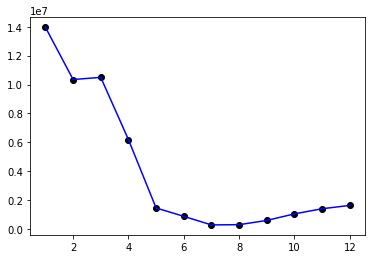

In [14]:
# check our accuracy for each degree, the lower the error the better!
#N
number_degrees = [1,2,3,4,5,6,7,8,9,10,11,12]
plt_mean_squared_error = []
for degree in number_degrees:
    poly_model = PolynomialFeatures(degree=degree)
    poly_x_values = poly_model.fit_transform(x_values)
    poly_model.fit(poly_x_values, y_values)
    regression_model = LinearRegression()
    regression_model.fit(poly_x_values, y_values)
    y_pred = regression_model.predict(poly_x_values)

    plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="black")
plt.plot(number_degrees,plt_mean_squared_error, color="blue") 

Here, we are getting the least error when the degree is = 7 

In [15]:
degree = 7
# PolynomialFeatures will create a new matrix consisting of all polynomial combinations 
# of the features with a degree less than or equal to the degree we just gave the model (7)
poly_model = PolynomialFeatures(degree=degree)

# transforming the polynomial features
poly_x_values = poly_model.fit_transform(x_values)
# fitting the model
poly_model.fit(poly_x_values, y_values)
# here we are transforming the data after that we are using linear regression
regression_model = LinearRegression()
regression_model.fit(poly_x_values, y_values)
y_pred = regression_model.predict(poly_x_values)

In [16]:
coeff =regression_model.coef_
print('Regression coefficient of the polynomial model is :\n',coeff)

msr = mean_squared_error(y_values, y_pred, squared=False)
print("Mean square error:",msr)


Regression coefficient of the polynomial model is :
 [-1.05030714e-09  1.04017152e-11  4.16048594e-11 ... -7.26297516e-08
 -7.07392373e-08  1.04450204e-10]
Mean square error: 288157.2600548543
